# Ch02.05. 히트맵

---
* 날짜:2022-04-18
* 이름:안창덕

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()
```

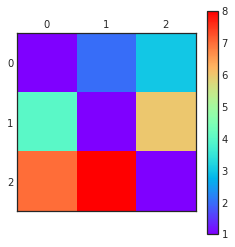

In [5]:
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
a = plt.matshow(x, cmap='rainbow')
plt.colorbar()
plt.show()

#### | 컬러바

```
plt.colorbar(ax, 
             cmap=None, # 컬러맵
             alpha=None, # 투명도
             orientation='vertical', # 위치 {'vertical', 'horizontal'}
             extend=None,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = None # 길이 축소
             aspect = None # 세로, 가로 비
             label=''# 라벨)
```

ValueError: ignored

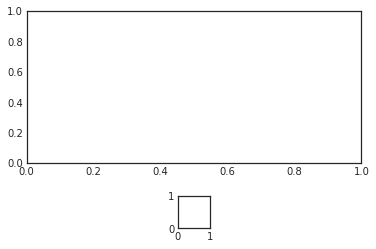

In [ ]:
plt.colorbar(a, 
             cmap='Blues', # 컬러맵
             alpha=.5, # 투명도
             orientation='horizontal', # 위치 {'vertical', 'horizontal'}
             extend=min,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = .8, # 길이 축소
             aspect = True, # 세로, 가로 비
             label='a')# 라벨)

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.heatmap(x)
```

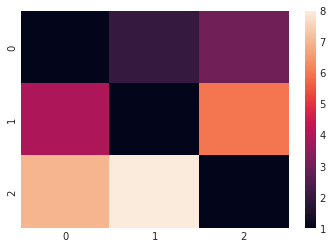

In [ ]:
sns.heatmap(x)

#### | 옵션

```
seaborn.heatmap(data,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=0, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = # 최소값
                vmax = # 최대값
                ax=None, **kwargs)
```

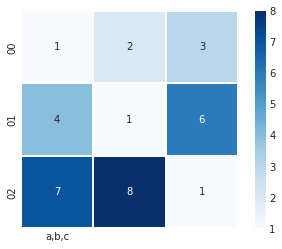

In [ ]:
sns.heatmap(x,
            cmap='Blues', # 컬러맵
            annot=True, # 값 표기
            fmt='d', # 데이터 타입
            linewidths=.7, # 선 굵기
            linecolor='white', # 선 색
            cbar=True, # 컬러맵 표기
            square=True, # 사이즈 정사각
            xticklabels=['a,b,c'], # x 눈금 라벨 
            yticklabels=['00','01','02']) # y 눈금 라벨

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.


In [ ]:
df = pd.DataFrame(np.arange(9))


* 데이터프레임에서 기본적으로 플롯을 제공합니다.

```
df.style.background_gradient()
```


In [ ]:
df.style.background_gradient()

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.heatmap(data=df)
```


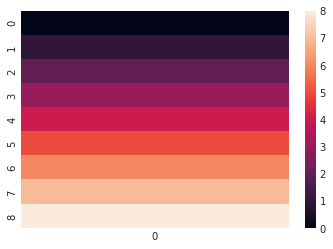

In [ ]:
sns.heatmap(data=df)


##  **실습** 
---



### (1) pivot 테이블 이용한 시계열 데이터 시각화


```
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

```

In [ ]:
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

df=pd.DataFrame([day, t]).T
df['count'] = vals
df.columns = ['day','time','count']
df

,day,time,count
0,2020/01/01,오전,202
1,2020/01/01,오후,448
2,2020/01/01,저녁,370
3,2020/01/02,오전,206
4,2020/01/02,오후,171
5,2020/01/02,저녁,288
6,2020/01/03,오전,120
7,2020/01/03,오후,202
8,2020/01/03,저녁,221
9,2020/01/04,오전,314


In [ ]:
 #         행 /   열 /   값
df.pivot('day','time','count').style.background_gradient()

time,오전,오후,저녁
day,,,
2020/01/01,202,448,370
2020/01/02,206,171,288
2020/01/03,120,202,221
2020/01/04,314,430,187
2020/01/05,472,199,459


### (2) Iris 데이터 변수별 상관관계 분석


```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from pandas.core.frame import DataFrame
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
y_names = iris.feature_names

x_data = iris.data
y_data = iris.target

df = pd.DataFrame(x_data)
df.columns = x_names
df['label']=y_data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.corr().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


### (3) Iris 데이터 종류별 크기 분석



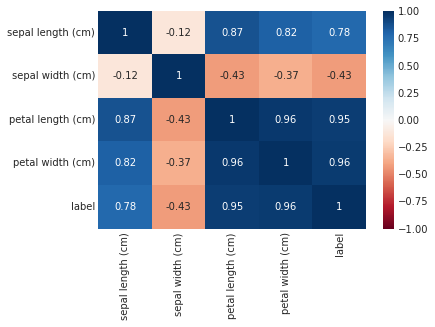

In [ ]:
sns.heatmap(df.corr(),
            cmap='RdBu',    #matplotlib 컬러 참고
            annot=True,
            cbar=True,
            vmin=-1, 
            vmax=1) 

plt.show()

In [ ]:
# 라벨 0 /1 /2 각각의 평균
df_mean = df.groupby('label').mean().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.936000,2.770000,4.260000,1.326000
2,6.588000,2.974000,5.552000,2.026000


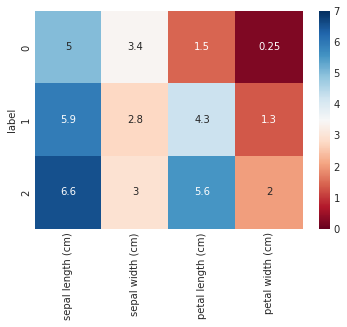

In [ ]:
# 히트맵
sns.heatmap(df.groupby('label').mean(),
            cmap='RdBu',    #matplotlib 컬러 참고
            annot=True,
            cbar=True,
            vmin=0, vmax=7)


##  **과제** 
---



### (1) 히트맵을 이용한 flight 데이터 시각화


```
df=sns.load_dataset('flights')
```

* `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러오세요.
* `year`를 세로축, `month`를 가로축으로 하는 피벗 테이블을 그리고 히트맵으로 시각화 하세요.



In [ ]:
df=sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df['passengers'].min()

104

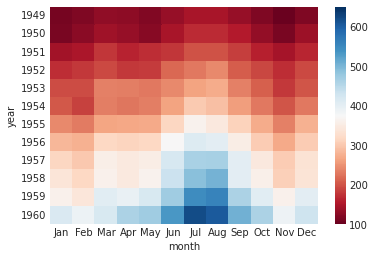

In [ ]:
df_pv = df.pivot('year','month','passengers')
sns.heatmap(df_pv,
            cmap='RdBu',  
            cbar=True,
            vmin=100, vmax=650)


### (2) 캘리포니아 집값 데이터 변수별 상관관계 분석

* /content/sample_data/california_housing_test.csv을 불러오세요.
* 변수별 상관관계를 나타내는 히트맵을 `seaborn`을 이용해  그리세요.
* 변수들 중 상관관계가 높은 변수 쌍을 각각 x축, y축으로 하는 산점도를 그리세요. (2개이상)
* 변수들 중 `median_house_value`와 가장 상관관계가 높은 변수를 찾고 둘을 각각 x축, y축으로 하는 산점도를 그리세요.

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


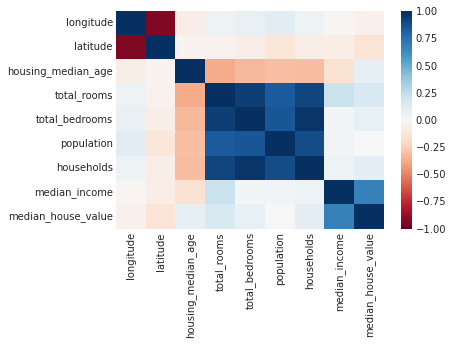

In [ ]:
sns.heatmap(df.corr(),
            cmap='RdBu',   
            cbar=True,
            vmin=-1, vmax=1)

plt.show()